This jupyter notebook performs hierarchial Bayesian model fitting on stop signal task data. 

In [1]:
import pymc as pm
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

In [2]:
# Define constants
SEED = 42
PARTICIPANT_ID = [0, 1, 2, 3, 4, 5, 6, 7, 8]

# Load data

In [3]:
data = pd.read_csv("../simulation/simulated_data/individual_simulated_data_fixed_SSD.csv")

In [4]:
# Determine number of trials per participant
T = sum(data['participant_id'] == PARTICIPANT_ID[0])

# Define the pymc model

In [5]:
# Import two custom likelihood functions
from util import stop_respond_log_likelihood, successful_inhibit_log_likelihood, precompute_legendre_quadrature

def fit_individual_model(go_rt_df, stop_respond_rt_df, stop_respond_ssd_df, successful_inhibition_ssd_df, nodes_array, weights_array):
    initval_dic = {
    'mu_go': 500,
    'sigma_go': 50,
    'tau_go': 50,
    'mu_stop': 300,
    'sigma_stop': 50,
    'tau_stop': 50,
    'p_tf': 0.5
    }
    
    with pm.Model() as model:
        # Define the distributions for the parameters using PyMC
        mu_go = pm.Uniform('mu_go', lower=0.001, upper=1000, initval=500)
        sigma_go = pm.Uniform('sigma_go', lower=1, upper=500, initval=50)
        tau_go = pm.Uniform('tau_go', lower=1, upper=500, initval=50)
        mu_stop = pm.Uniform('mu_stop', lower=0.001, upper=1000, initval=300)
        sigma_stop = pm.Uniform('sigma_stop', lower=1, upper=500, initval=50)
        tau_stop = pm.Uniform('tau_stop', lower=1, upper=500, initval=50)
        p_tf = pm.Uniform('p_tf', lower=0.0, upper=1.0, initval=0.5)

        # Define the likelihood
        go_likelihood = pm.ExGaussian('go_likelihood', 
                                      mu=mu_go, 
                                      sigma=sigma_go, 
                                      nu=tau_go, 
                                      observed=go_rt_df)

        stop_respond_likelihood = pm.Potential('stop_respond_likelihood', stop_respond_log_likelihood(
            stop_respond_rt_df, 
            mu_go, sigma_go, tau_go, 
            mu_stop, sigma_stop, tau_stop, 
            p_tf, stop_respond_ssd_df)
        )

        successful_inhibit_likelihood = pm.Potential('successful_inhibition_likelihood', successful_inhibit_log_likelihood(
            mu_go, sigma_go, tau_go, 
            mu_stop, sigma_stop, tau_stop, 
            p_tf, successful_inhibition_ssd_df, nodes_array, weights_array)
        )
        
        # Sample from the posterior
        trace = pm.sample(
            draws=2000, tune=2000, target_accept=0.95, 
            return_inferencedata=True, random_seed=SEED, 
            initvals=initval_dic
        )
    
    return trace

# Model Fitting

In [6]:
go_data = data[data['trial_type'] == 'go']
stop_respond_data = data[data['outcome'] == 'stop-respond']
successful_inhibition_data = data[data['outcome'] == 'successful inhibition']

traces = []
for i in PARTICIPANT_ID:
    go_rt_df = go_data.loc[go_data['participant_id'] == i, 'observed_rt']
    stop_respond_rt_df = stop_respond_data.loc[stop_respond_data['participant_id'] == i, 'observed_rt']
    stop_respond_ssd_df = stop_respond_data.loc[stop_respond_data['participant_id'] == i, 'ssd']
    successful_inhibition_ssd_df = successful_inhibition_data.loc[successful_inhibition_data['participant_id'] == i, 'ssd']
    
    rt_upper_bound = [max(data.loc[data['participant_id'] == i, 'observed_rt']) + 1000]

    nodes_array, weights_array = precompute_legendre_quadrature(successful_inhibition_ssd_df.values, rt_upper_bound, 500)

    trace = fit_individual_model(go_rt_df, stop_respond_rt_df, stop_respond_ssd_df, successful_inhibition_ssd_df.values, nodes_array, weights_array)
    traces.append(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_go, sigma_go, tau_go, mu_stop, sigma_stop, tau_stop, p_tf]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 2474 seconds.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_go, sigma_go, tau_go, mu_stop, sigma_stop, tau_stop, p_tf]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 213 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_go, sigma_go, tau_go, mu_stop, sigma_stop, tau_stop, p_tf]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 501 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_go, sigma_go, tau_go, mu_stop, sigma_stop, tau_stop, p_tf]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 9450 seconds.
There were 37 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_go, sigma_go, tau_go, mu_stop, sigma_stop, tau_stop, p_tf]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 221 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_go, sigma_go, tau_go, mu_stop, sigma_stop, tau_stop, p_tf]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 5727 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_go, sigma_go, tau_go, mu_stop, sigma_stop, tau_stop, p_tf]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 77 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_go, sigma_go, tau_go, mu_stop, sigma_stop, tau_stop, p_tf]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 1986 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_go, sigma_go, tau_go, mu_stop, sigma_stop, tau_stop, p_tf]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 2714 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


# Save the Model

The first step is to combine each participant's trace into a large InferenceData:

In [7]:
import xarray as xr

# Extract the posterior datasets from each trace
posterior_datasets = [trace.posterior for trace in traces]

# Add a participant_id coordinate to each posterior dataset
for i, ds in enumerate(posterior_datasets):
    ds.coords['participant_id'] = i

# Concatenate the posterior datasets along the new participant_id dimension
combined_posterior = xr.concat(posterior_datasets, dim='participant_id')

# Create an InferenceData object with the combined posterior
combined_trace = az.InferenceData(posterior=combined_posterior)

Then, save the combined trace as netcdf:

In [8]:
az.to_netcdf(trace, f"saved_trace/simple_test_individuall_combined_trace_T_{T}.nc")

# Load trace netcdf
# az.from_netcdf("saved_trace/simple_test_hierarchical.nc")

'saved_trace/simple_test_individuall_combined_trace_T_1000.nc'

# Check Model Fit

Define parameters of interest:

In [9]:
participant_parameters = ['mu_go', 'sigma_go', 'tau_go',
                          'mu_stop', 'sigma_stop', 'tau_stop',
                          'p_tf']

## Forest Plot

array([<Axes: title={'center': '94.0% HDI'}>,
       <Axes: title={'center': 'ess'}>, <Axes: title={'center': 'r_hat'}>],
      dtype=object)

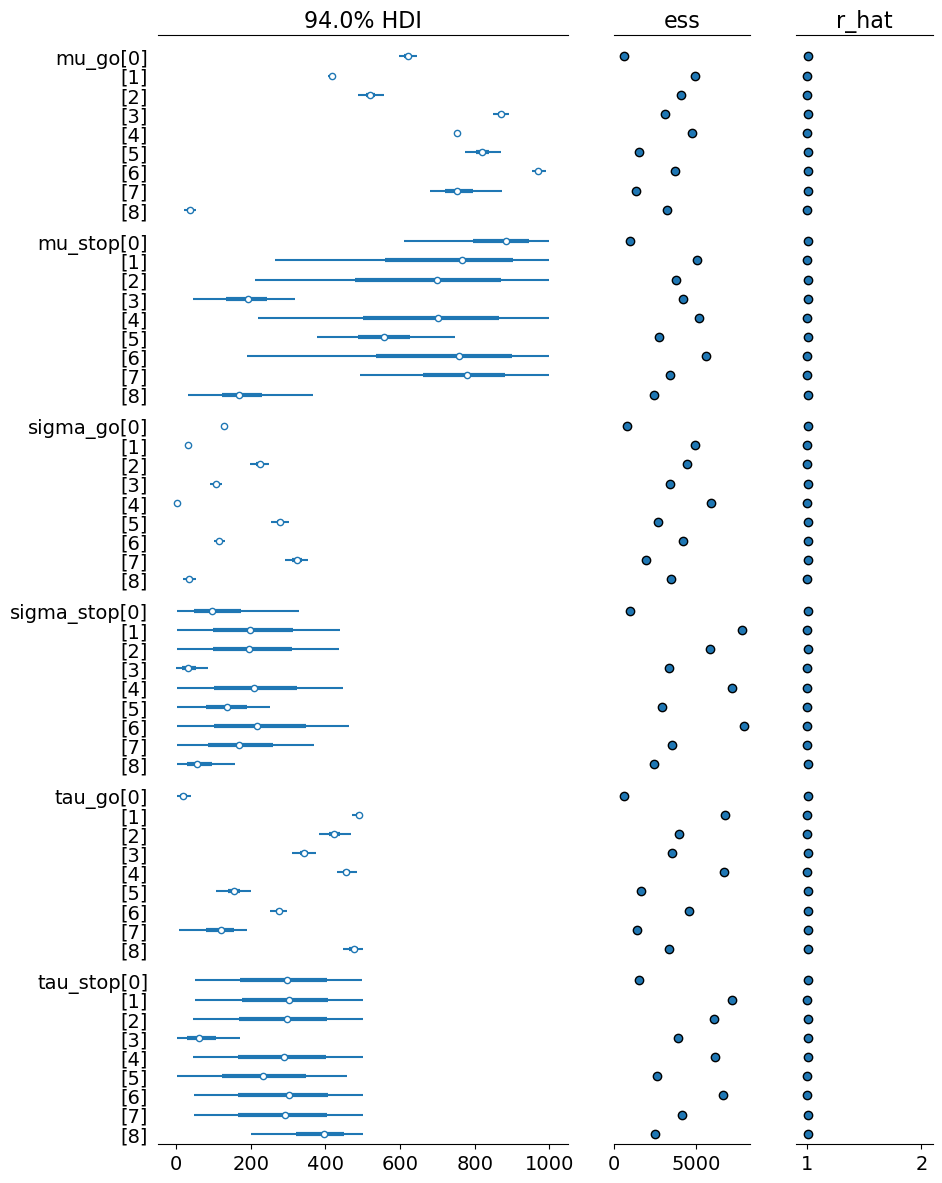

In [10]:
az.plot_forest(combined_trace, var_names=['~p_tf'], filter_vars="regex", combined=True, r_hat=True, ess=True)

array([<Axes: title={'center': '94.0% HDI'}>,
       <Axes: title={'center': 'ess'}>, <Axes: title={'center': 'r_hat'}>],
      dtype=object)

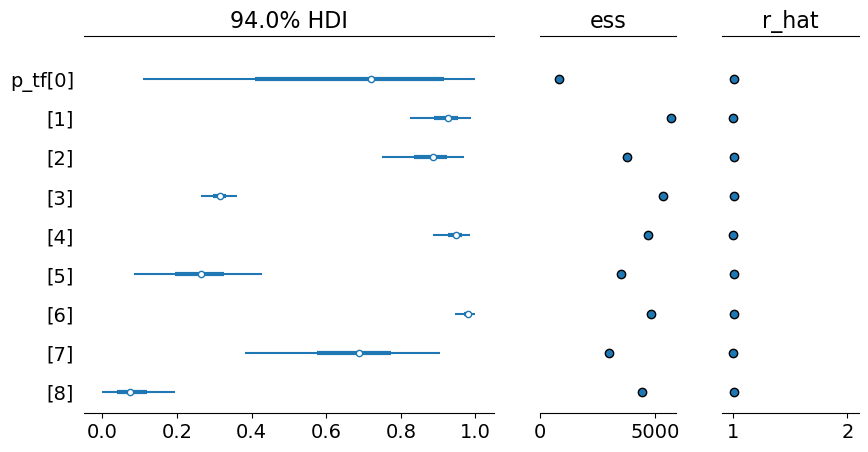

In [11]:
az.plot_forest(combined_trace, var_names=['p_tf'], filter_vars="regex", combined=True, r_hat=True, ess=True)

## Traceplot

array([[<Axes: title={'center': 'mu_go'}>,
        <Axes: title={'center': 'mu_go'}>],
       [<Axes: title={'center': 'sigma_go'}>,
        <Axes: title={'center': 'sigma_go'}>],
       [<Axes: title={'center': 'tau_go'}>,
        <Axes: title={'center': 'tau_go'}>],
       [<Axes: title={'center': 'mu_stop'}>,
        <Axes: title={'center': 'mu_stop'}>],
       [<Axes: title={'center': 'sigma_stop'}>,
        <Axes: title={'center': 'sigma_stop'}>],
       [<Axes: title={'center': 'tau_stop'}>,
        <Axes: title={'center': 'tau_stop'}>],
       [<Axes: title={'center': 'p_tf'}>,
        <Axes: title={'center': 'p_tf'}>]], dtype=object)

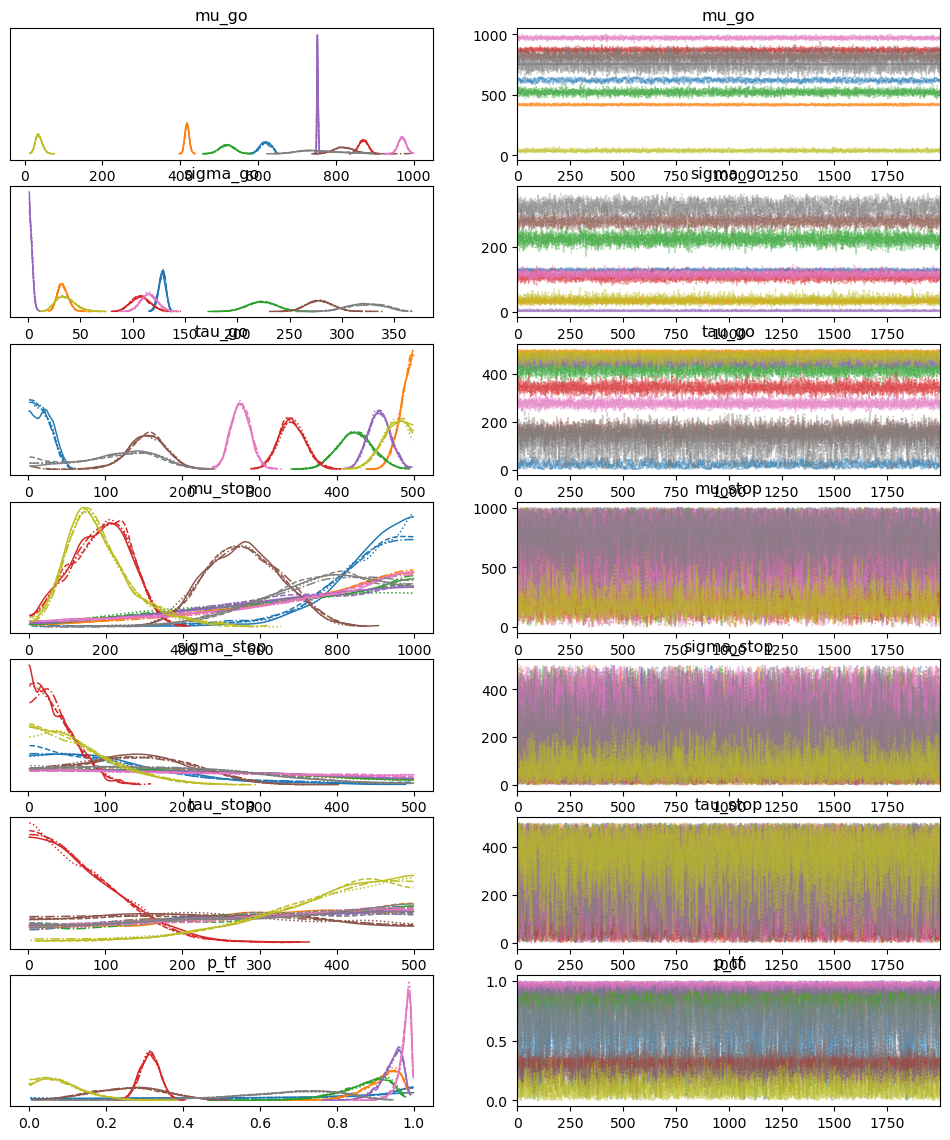

In [12]:
az.plot_trace(combined_trace, var_names=participant_parameters)

## Summary Statistics

In [13]:
summary_stats = az.summary(combined_trace, hdi_prob=0.95)
summary_stats

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_go[0],619.748,13.359,595.645,644.559,0.526,0.373,651.0,1851.0,1.01
mu_go[1],417.447,5.454,407.084,428.293,0.078,0.055,5053.0,4658.0,1.00
mu_go[2],520.348,18.701,483.525,556.622,0.292,0.206,4098.0,4645.0,1.00
mu_go[3],870.807,11.483,849.146,893.264,0.205,0.145,3132.0,4145.0,1.00
mu_go[4],753.047,1.539,750.260,756.158,0.022,0.016,4923.0,4895.0,1.00
...,...,...,...,...,...,...,...,...,...
tau_stop[4],278.350,140.415,35.366,499.998,1.790,1.266,5669.0,4039.0,1.00
tau_stop[5],238.486,136.553,2.590,465.751,2.677,1.893,2587.0,3098.0,1.00
tau_stop[6],284.321,141.299,38.728,499.451,1.735,1.227,6234.0,4467.0,1.00
tau_stop[7],280.742,139.669,39.427,499.985,2.170,1.535,3947.0,3505.0,1.00


## Compare true and posterior parameters

Load true parameters:

In [14]:
true_parameters_df = pd.read_csv("../simulation/true_param/individual_true_parameters_fixed_SSD.csv")
true_parameters_df = true_parameters_df[true_parameters_df['participant_id'].isin(PARTICIPANT_ID)]
true_parameters_df

,participant_id,mu_go,sigma_go,tau_go,mu_stop,sigma_stop,tau_stop,p_tf
0,0,636.185976,127.257256,9.766184,763.933104,36.548362,234.277899,0.916744
1,1,423.872104,37.825157,495.928449,971.336133,355.369702,24.177999,0.910987
2,2,514.406630,219.643011,416.381706,712.970692,36.828432,298.159495,0.876593
3,3,843.544385,95.983259,343.337111,3.007176,160.344469,54.530350,0.309318
4,4,753.603425,4.597648,452.982359,213.645126,335.728713,487.473346,0.954656
5,5,820.818012,283.692903,170.075761,595.928299,94.359227,233.445160,0.175095
6,6,983.820966,120.263489,261.030764,366.519108,365.136521,417.692891,0.996628
7,7,710.055817,315.919554,171.023416,933.504970,249.877999,42.437087,0.752033
8,8,5.043080,289.690153,354.206336,106.795479,278.135851,313.066781,0.150381


In [15]:
# Convert the columns of true parameter values in the dataframe into a single list
true_parameters_ref_list = []
for param in participant_parameters:
    true_parameters_ref_list.extend(list(true_parameters_df[param].values))

Plot posterior distribution of parameters and include true paramter values as reference values to see if they lie within 94% HDI:

array([[<Axes: title={'center': 'mu_go\n0'}>,
        <Axes: title={'center': 'mu_go\n1'}>,
        <Axes: title={'center': 'mu_go\n2'}>],
       [<Axes: title={'center': 'mu_go\n3'}>,
        <Axes: title={'center': 'mu_go\n4'}>,
        <Axes: title={'center': 'mu_go\n5'}>],
       [<Axes: title={'center': 'mu_go\n6'}>,
        <Axes: title={'center': 'mu_go\n7'}>,
        <Axes: title={'center': 'mu_go\n8'}>],
       [<Axes: title={'center': 'sigma_go\n0'}>,
        <Axes: title={'center': 'sigma_go\n1'}>,
        <Axes: title={'center': 'sigma_go\n2'}>],
       [<Axes: title={'center': 'sigma_go\n3'}>,
        <Axes: title={'center': 'sigma_go\n4'}>,
        <Axes: title={'center': 'sigma_go\n5'}>],
       [<Axes: title={'center': 'sigma_go\n6'}>,
        <Axes: title={'center': 'sigma_go\n7'}>,
        <Axes: title={'center': 'sigma_go\n8'}>],
       [<Axes: title={'center': 'tau_go\n0'}>,
        <Axes: title={'center': 'tau_go\n1'}>,
        <Axes: title={'center': 'tau_go\n2'}>

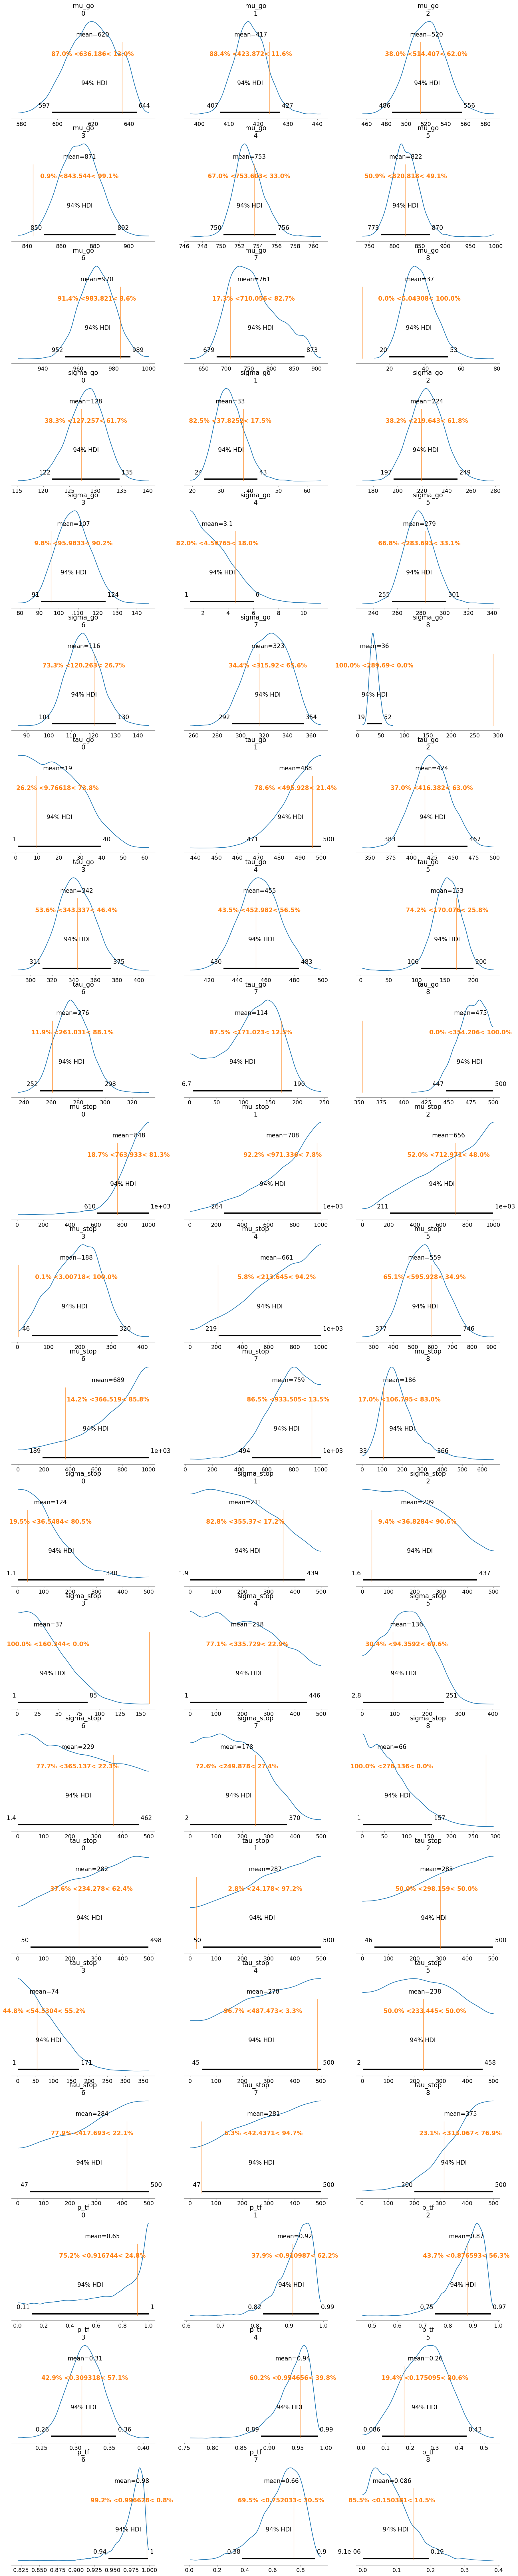

In [16]:
# Adjust the maximum number of plots to plot for arviz
az.rcParams['plot.max_subplots'] = len(PARTICIPANT_ID) * len(participant_parameters)
az.plot_posterior(combined_trace, var_names=participant_parameters, ref_val=true_parameters_ref_list)